***CODSOFT DATASCIENCE INTERNSHIP***<BR>
**TASK 4:SALES PREDICTION USING PYTHON** <BR>
Sales prediction involves forecasting the amount of a product that
customers will purchase, taking into account various factors such as
advertising expenditure, target audience segmentation, and
advertising platform selection.
In businesses that offer products or services, the role of a Data
Scientist is crucial for predicting future sales. They utilize machine
learning techniques in Python to analyze and interpret data, allowing
them to make informed decisions regarding advertising costs. By
leveraging these predictions, businesses can optimize their
advertising strategies and maximize sales potential. Let'
s embark on
the journey of sales prediction using machine learning in Python.

In [1]:
#import's
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read data into a dataframe
data = pd.read_csv(r'advertising.csv',header=0)
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
#EDA
print(data.info())
print()
print(data.dtypes)
print()
print(data.shape)
print()
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

(200, 4)

               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000


We are not doing feature selection. Since all are important in business point-of-view 

In [4]:
#Finding null value
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

Checking for null value

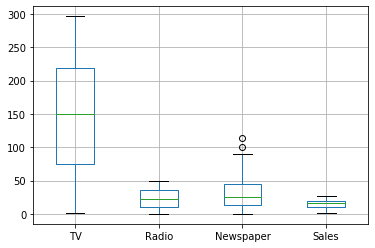

In [5]:
#checking for outliers
data.boxplot()

Looking for outliers

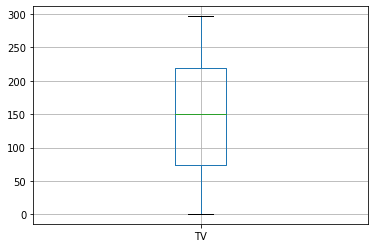

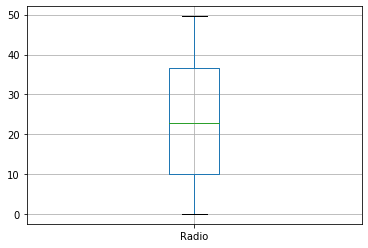

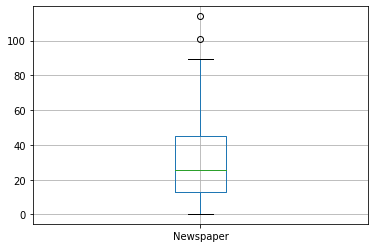

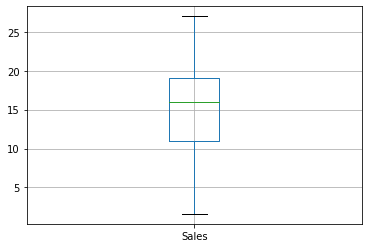

In [6]:
#Assumption 1: There should be no outliers in the data.
#Check using for loop and boxplot

for i in data.columns:
    data.boxplot(column=i)
    plt.show()

We observe that newspaper have few outliers which can be eliminated before we processed

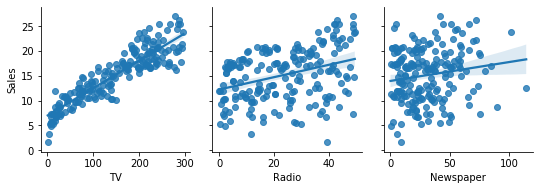

In [7]:
#Assumption 2: Assumption of linearity: Every independent variable should have a linear
# relationship with the dependent variable

sns.pairplot(data,x_vars=['TV','Radio','Newspaper'],
             y_vars=['Sales'],kind = 'reg')
plt.show()

Looking for the relation between variables through linear regression line. Newspaper show's no relation with sales. So we can eliminate the newspaper variable and proceed with TV and radio this show a linear relation with sales variable

In [8]:
data.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [9]:
#create x and y 
X=data.iloc[:,0:-1]
Y=data.iloc[:,-1]

In [10]:
print(X.shape)
print(Y.shape)

(200, 3)
(200,)


In [11]:
import warnings
warnings.filterwarnings("ignore")

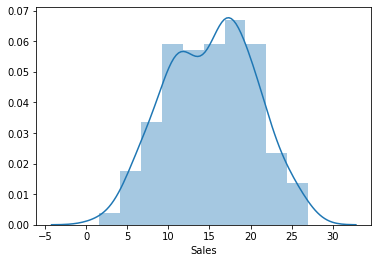

In [12]:
#Assumption of Normality: The dependent variable 
#should follow an approximate normal distribution
sns.distplot(Y)
plt.show()

This graph show approximate normal distribution. Just a little right skwness can be seen if nesscery we can use log transformation

In case y does not follow a normal distribution than we have to perporm log transformation to reduce skewness in Y and go ahead with the Y_log

#To see the above code display

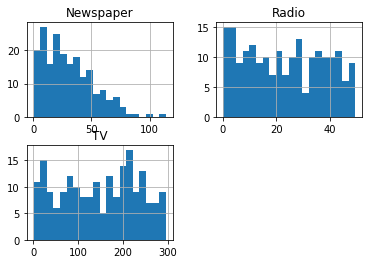

In [13]:
X.hist(bins=20)
plt.show()

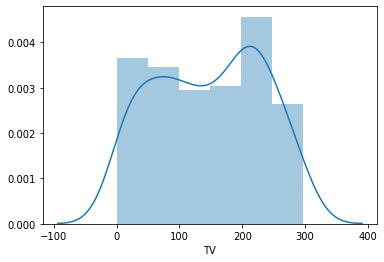

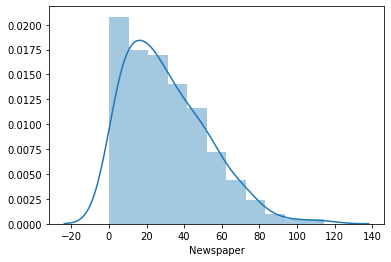

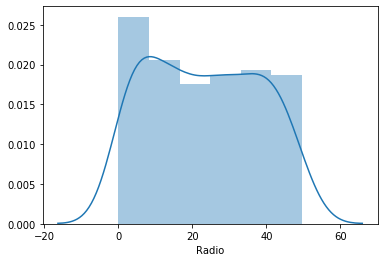

In [14]:
sns.distplot(X.TV)
plt.show()

sns.distplot(X.Newspaper)
plt.show()

sns.distplot(X.Radio)
plt.show()

In [15]:
from scipy.stats import skew
#finding the skewness in each variable
#apply is to run on multiple index
data_num_skew = X.apply(lambda i: skew(i.dropna()))
#subsetting the variables that are highly skewed
data_num_skewed = data_num_skew[(data_num_skew > .75) | (data_num_skew < -.75)]
 
print(data_num_skew)
print(data_num_skewed)
import numpy as np
# apply log + 1 transformation for all numeric features with skewness over .75
X[data_num_skewed.index] = np.log1p(X[data_num_skewed.index])

TV          -0.069328
Radio        0.093467
Newspaper    0.887996
dtype: float64
Newspaper    0.887996
dtype: float64


We use log1p if data contain 0. because normal log 0 value is infinite. To get out of infinite we use log1p

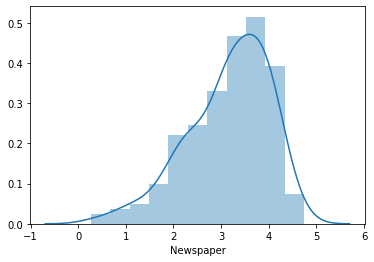

In [16]:
sns.distplot(X.Newspaper)
plt.show()

                 TV     Radio  Newspaper
TV         1.000000  0.054809   0.030951
Radio      0.054809  1.000000   0.251909
Newspaper  0.030951  0.251909   1.000000


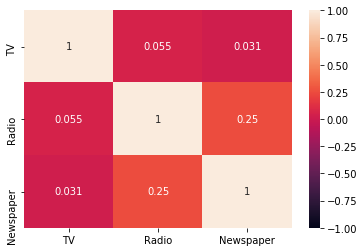

In [17]:
#Assumption of no multicollinearity: There should be no multicollinearity
#between the independent variables
#multicollinearity is the relationship amongst the multiple independent variables
corr_df=X.corr(method="pearson")
print(corr_df)
 
sns.heatmap(corr_df,vmax=1.0,vmin=-1.0,annot=True)
plt.show()

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
 
vif_df = pd.DataFrame()
vif_df["features"] = X.columns
vif_df["VIF Factor"] = [vif(X.values, i) for i in range(X.shape[1])]
vif_df.round(2)

,features,VIF Factor
0,TV,3.39
1,Radio,3.63
2,Newspaper,5.44


Trying to build the model 

Before bulding the model we have to split the data into train and test, if we don't have the testing data 

In [19]:
from sklearn.model_selection import train_test_split
 
#Split the data into test and train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, 
                                                    random_state=10) 

In [20]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
#print("Percent of train data",X_train.shape[0]/X.shape[0]*100)

(160, 3)
(40, 3)
(160,)
(40,)


In [21]:
from sklearn.linear_model import LinearRegression
#create a model object
lm = LinearRegression()
#train the model object
lm.fit(X_train,Y_train)

#print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

4.8465871993990515
[ 0.05350462  0.10864058 -0.02739034]


In [22]:
#pair the feature names with the coefficients
print(list(zip(X.columns, lm.coef_)))

[('TV', 0.053504620408701756), ('Radio', 0.10864058303632279), ('Newspaper', -0.027390342656605372)]


In [23]:
#Predict using the model
Y_pred = lm.predict(X_test)
print(Y_pred)

[19.2610297  10.50598164 19.43187866 24.46815242 20.85385189 15.24213698
 16.80338695 20.74290276 21.12424533 10.63698455 24.83404133  8.92497363
 10.37503597 20.15094747 20.51665799 13.49589917 21.38282963  8.31972272
 21.81972082 20.63186092 17.12266624  9.12397322 23.35618877 15.06635766
 20.85069348  8.10206668 10.38941    11.39219044 22.10956916  7.99978521
 13.79428466 21.04562009  6.40750056  6.44319199 20.78414309 19.81335357
  9.07404676 21.15471974 10.62281213 17.04291313]


In [24]:
new_df=pd.DataFrame()
new_df=X_test.copy()
 
new_df["Actual sales"]=Y_test
new_df["Predicted sales"]=Y_pred
new_df = new_df.reset_index().drop("index",axis=1)

In [25]:
new_df

,TV,Radio,Newspaper,Actual sales,Predicted sales
0,210.7,29.5,2.332144,18.4,19.261030
1,8.7,48.9,4.330733,7.2,10.505982
2,218.4,27.7,3.996364,18.0,19.431879
3,283.6,42.0,4.207673,25.5,24.468152
4,216.4,41.7,3.703768,22.6,20.853852
5,147.3,23.9,3.000720,14.6,15.242137
6,188.4,18.1,3.280911,19.9,16.803387
7,198.9,49.4,4.110874,23.7,20.742903
8,216.8,43.9,3.339322,22.3,21.124245
9,17.2,45.9,4.252772,12.0,10.636985


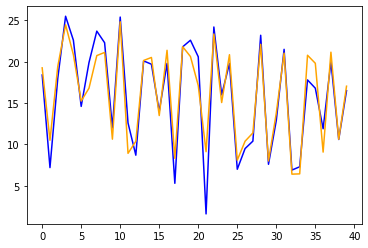

In [26]:
new_df["Actual sales"].plot(color='blue')
new_df["Predicted sales"].plot(color='orange')
plt.show()

In [27]:
lm.score(X_train, Y_train)
#Y_pred=lm.predict(X_train)
#score=r2_score(Y_train,Y_pred)

0.9070726348183751

In [28]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)
 
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.888517235220462
RMSE: 2.110604158729546
Adj R-square: 0.8868108663717956


As the R-Squared value is closer to 1 so it's an good model. To prove it RMSE value is 2.5 which is between 1.6 and 25.5, the RMSE value is closer to minimum value.

In [29]:
print(Y_test.min())
print(Y_test.max())

1.6
25.5


In [30]:
new_df["Residual"]=new_df["Actual sales"]-new_df["Predicted sales"]
new_df.to_excel("Sales Prediction.xlsx",header=True,index=True)
new_df.head()

,TV,Radio,Newspaper,Actual sales,Predicted sales,Residual
0,210.7,29.5,2.332144,18.4,19.261030,-0.861030
1,8.7,48.9,4.330733,7.2,10.505982,-3.305982
2,218.4,27.7,3.996364,18.0,19.431879,-1.431879
3,283.6,42.0,4.207673,25.5,24.468152,1.031848
4,216.4,41.7,3.703768,22.6,20.853852,1.746148


In [31]:
from sklearn.model_selection import train_test_split
 
#Split the data into test and train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, 
                                                    random_state=10)

In [32]:
from sklearn.linear_model import Ridge
#create a model object
rid = Ridge()
#train the model object
rid.fit(X_train,Y_train)

#print intercept and coefficients
print(rid.intercept_)
print(rid.coef_)

4.8460066052192765
[ 0.0535045   0.10863439 -0.02715513]


In [33]:
Y_pred = rid.predict(X_test)

In [34]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2=r2_score(Y_test,Y_pred)
print(r2)
 
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print(rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared)

0.8885203675797508
2.1105745074332476
0.8868140466753592


In [35]:
from sklearn.linear_model import Lasso
#create a model object
las = Lasso()
#train the model object
las.fit(X_train,Y_train)

#print intercept and coefficients
print(las.intercept_)
print(las.coef_)

4.890111203757092
[ 0.05339547  0.10353356 -0.        ]


In [36]:
Y_pred = las.predict(X_test)

In [37]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2=r2_score(Y_test,Y_pred)
print(r2)
 
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print(rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared)

0.8887804037153686
2.1081115191417372
0.88707806295591


In [38]:
from sklearn.linear_model import ElasticNet
#create a model object
EN = ElasticNet(alpha=1, l1_ratio=0)    #Hyperparameter
#train the model object
EN.fit(X_train,Y_train)

#print intercept and coefficients
print(EN.intercept_)    #Parameter
print(EN.coef_)

4.8128430437443335
[ 0.05349511  0.1079188  -0.01103131]


In [39]:
Y_pred = EN.predict(X_test)

In [40]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2=r2_score(Y_test,Y_pred)
print(r2)
 
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print(rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared)

0.8887430934320377
2.1084650883209526
0.8870401815968139


Statistic Model

In [43]:
new_df = pd.DataFrame()
new_df = X_train.copy()

new_df["Sales"]=Y_train.copy()
new_df.shape

(160, 4)

In [44]:
import statsmodels.formula.api as sm
 
# create a fitted model with all three features
lm_model = sm.ols(formula='Sales ~ TV + Radio + Newspaper', 
                  data=new_df).fit()
 
# print the coefficients
print(lm_model.params)
print(lm_model.summary())


Intercept    4.846587
TV           0.053505
Radio        0.108641
Newspaper   -0.027390
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     507.6
Date:                Mon, 01 Jan 2024   Prob (F-statistic):           3.13e-80
Time:                        10:28:22   Log-Likelihood:                -293.00
No. Observations:                 160   AIC:                             594.0
Df Residuals:                     156   BIC:                             606.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

In [45]:
Y_pred = lm_model.predict(X_test)

In [46]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2=r2_score(Y_test,Y_pred)
print(r2)
 
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print(rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared)

0.8885172352204653
2.110604158729515
0.886810866371799


In [47]:
import statsmodels.formula.api as sm
 
# create a fitted model with all three features
lm_model = sm.ols(formula='Sales ~ TV + Radio', 
                  data=new_df).fit()
 
# print the coefficients
print(lm_model.params)
print(lm_model.summary())

Intercept    4.770341
TV           0.053492
Radio        0.108298
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     766.0
Date:                Mon, 01 Jan 2024   Prob (F-statistic):           1.02e-81
Time:                        10:28:23   Log-Likelihood:                -293.02
No. Observations:                 160   AIC:                             592.0
Df Residuals:                     157   BIC:                             601.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------

In [48]:
Y_pred = lm_model.predict(X_test)

In [49]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2=r2_score(Y_test,Y_pred)
print(r2)
 
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print(rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared)

0.8888575136882888
2.1073806020508212
0.8871563531835177


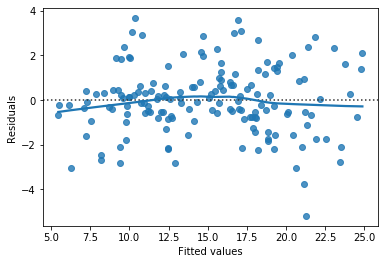

In [50]:
#Assumption: Errors should be random
#checked using Residual v/s Fitted plot
model_fitted_y = lm_model.fittedvalues
sns.residplot(x=model_fitted_y, y='Sales', data=new_df, lowess=True)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

We should get a ramdom line generated it should not show a repeated or wave like pattern pattern 

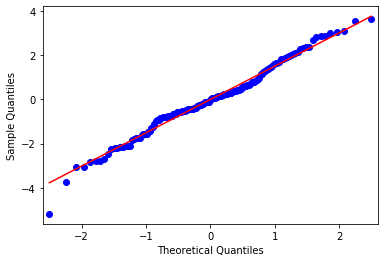

In [51]:
#Assumption: Errors should follow a approximate normal distribution
#checked using Normal QQ plot
import statsmodels.api as sma
sma.qqplot(lm_model.resid, line='s')
plt.show()

The errors should follow the red line 
The normal qq plot is used to compare our data with standard normally distributed data (Theratical Quantiles) if the errors or data point follow the red digonal line then it means it follows the normal distribution. 

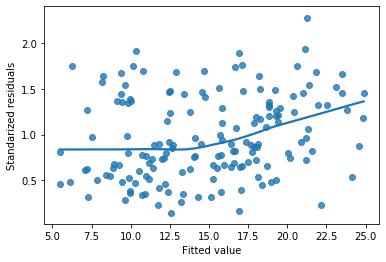

In [52]:
#Assumption: Errors should follow a constant variance-->Homoskedasticity
#checked using Scale location plot
model_norm_residuals_abs_sqrt=np.sqrt(np.abs(lm_model.resid))
 
sns.regplot(x=lm_model.fittedvalues,
            y=model_norm_residuals_abs_sqrt,
              scatter=True, lowess=True)        
plt.ylabel("Standarized residuals")
plt.xlabel("Fitted value")
plt.show()

We should end up getting an approcimate horizontal line and not a V shaped line or a steep curve.

## Result of all the models :

In [54]:
results = pd.DataFrame({
    'Model': ['linear reg','ridge','elastic net','lasso','ols','Tuned ols'],
    'Score': [88.85,88.85,88.87,88.87,88.85,88.88]})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(10)

,Model
Score,
88.88,Tuned ols
88.87,elastic net
88.87,lasso
88.85,linear reg
88.85,ridge
88.85,ols


# Out of all the model used in the prediction of Sales prediction involves forecasting the amount of a product that customers will purchase, the tuned ols  model is giving a high accuracy of 88.88% and showing best result than the other models